In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#This function will be all the webscraping elements in the program
def backend(urls):
    
    #I have made two lists for the two elements I am going to extract
    heights_list = []
    names_list = []
    
    #I am taking in urls and going through all the https sites and requesting the data
    for url in urls:
        page = requests.get(url, verify= False)
        soup = BeautifulSoup(page.content, 'html.parser')

        #I am then extracting the heights and names from the class and id
        heights = soup.find_all('td', class_='height')
        names = soup.find_all('td', class_='sidearm-table-player-name')

        #Then in a loop we append the names and heights in the list after the data is cleaned
        for height in heights:
            heights_list.append(float(height['data-sort']))
        for name in names:
            names_list.append(name.get_text(strip=True))
    
    #Then we make it into a pandas dataframe
    data = {
        'Name' : names_list,
        'Height' : heights_list
    }
    df = pd.DataFrame(data)

    #Here we replace the empty values(0.0) with the average 
    df['Height'] = df['Height'].replace(0.0, np.nan)
    #rounds and make to the second decimal point
    mean_height = round(df['Height'].mean(),2)
    df['Height'].fillna(mean_height, inplace=True)
    
    return df
    

In [ ]:
#This function calls the df variable from above and prints out the table. The sport variable is the name of the url (ex. Mens swimming)
def stats(sport, df):
    print("**************************************************************")
    print (f'This is {sport} statistics')
    print("**************************************************************")
    print (df, '\n','\n',df.describe())

In [ ]:
#This function will show the 5 shortest and tallest heights and there names
def players_heights(df,team_name):
    print()
    print('**************************************************************')
    print(f"Top 5 Shortest and Tallest Players in {team_name}")
    print("**************************************************************")

    #sort the DataFrame by height
    sorted_df = df.sort_values(by='Height')

    #get unique heights for the shortest and tallest players
    shortest_heights = sorted_df['Height'].unique()[:5]
    tallest_heights = sorted_df['Height'].unique()[-5:]

    #select players with the top 5 shortest heights
    print("Top 5 Shortest Players: ",'\n')
    shortest_athletes = sorted_df[sorted_df['Height'].isin(shortest_heights)]
    for i, row in shortest_athletes.iterrows():
        print(f"{row['Name']} - {row['Height']}")

    #select players with the top 5 tallest heights
    print()
    print("**************************************************************")
    print("Top 5 Tallest Players: ",'\n')
    tallest_athletes = sorted_df[sorted_df['Height'].isin(tallest_heights)]
    for i, row in tallest_athletes.iterrows():
        print(f"{row['Name']} - {row['Height']}")

    print("**************************************************************")

In [ ]:
# This function calculates the average heights and plots them
def chart(team_data):
    # Dictionary to store the average height for each team category
    average_heights = {}
    
    # Calculate average height for each team in team_data dictionary
    for team, df in team_data.items():
        if 'Height' in df.columns and not df['Height'].empty:
            average_heights[team] = np.mean(df['Height'])
    
    # Plotting the average heights with values displayed on top of each bar
    plt.figure(figsize=(8, 6))
    bars = plt.bar(average_heights.keys(), average_heights.values(), color='skyblue')
    plt.xlabel("Team Categories")
    plt.ylabel("Average Height (inches)")
    plt.title("Average Height Distribution Across Team Categories")
    
    # Add values on top of each bar
    for bar, height in zip(bars, average_heights.values()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{height:.2f}', 
                 ha='center', va='bottom', color='black', fontweight='bold')
    
    plt.show()

In [ ]:
#This function is for the user who is using it so it makes it easier for me and the person who is using this program to look at the data 
def webpage():
    
    #Here we put into a list the name of the webiste and the url of the webiste so it can be called later
    url_teams ={
        1 : ("Mens Volleyball Team" , 
        'https://ccnyathletics.com/sports/mens-volleyball/roster?view=2', 
        'https://lehmanathletics.com/sports/mens-volleyball/roster?view=2',
        'https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster?view=2',
        'https://johnjayathletics.com/sports/mens-volleyball/roster?view=2',
        'https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster?view=2',
        'https://mecathletics.com/sports/mens-volleyball/roster?view=2',
        'https://www.huntercollegeathletics.com/sports/mens-volleyball/roster?view=2',
        'https://yorkathletics.com/sports/mens-volleyball/roster?view=2',
        'https://ballstatesports.com/sports/mens-volleyball/roster?view=2'),

        2 : ("Mens Swimming Team" , 
        'https://csidolphins.com/sports/mens-swimming-and-diving/roster?view=2',
        'https://yorkathletics.com/sports/mens-swimming-and-diving/roster?view=2',
        'https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster?view=2',
        'https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster?view=2',
        'https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster?view=2',
        'https://mckbearcats.com/sports/mens-swimming-and-diving/roster?view=2',
        'https://ramapoathletics.com/sports/mens-swimming-and-diving/roster?view=2',
        'https://oneontaathletics.com/sports/mens-swimming-and-diving/roster?view=2',
        'https://bubearcats.com/sports/mens-swimming-and-diving/roster/2021-22?view=2',
        'https://albrightathletics.com/sports/mens-swimming-and-diving/roster/2021-22?view=2'),

        3 : ("Womens Volleyball Team" ,
        'https://bmccathletics.com/sports/womens-volleyball/roster?view=2',
        'https://yorkathletics.com/sports/womens-volleyball/roster?view=2',
        'https://hostosathletics.com/sports/womens-volleyball/roster?view=2',
        'https://bronxbroncos.com/sports/womens-volleyball/roster/2021?view=2',
        'https://queensknights.com/sports/womens-volleyball/roster?view=2',
        'https://augustajags.com/sports/wvball/roster?view=2',
        'https://flaglerathletics.com/sports/womens-volleyball/roster?view=2',
        'https://pacersports.com/sports/womens-volleyball/roster?view=2',
        'https://www.golhu.com/sports/womens-volleyball/roster?view=2'),

        4 : ("Womens Swimming Team" , 
        'https://csidolphins.com/sports/womens-swimming-and-diving/roster?view=2',
        'https://queensknights.com/sports/womens-swimming-and-diving/roster?view=2',
        'https://yorkathletics.com/sports/womens-swimming-and-diving/roster?view=2',
        'https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?path=wswim?view=2',
        'https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster?view=2',
        'https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster?view=2',
        'https://mckbearcats.com/sports/womens-swimming-and-diving/roster?view=2',
        'https://ramapoathletics.com/sports/womens-swimming-and-diving/roster?view=2',
        'https://keanathletics.com/sports/womens-swimming-and-diving/roster?view=2',
        'https://oneontaathletics.com/sports/womens-swimming-and-diving/roster')
    }

    #Here is the variable where we take the csv file and put it onto the desktop
    desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
    
    #dictionary to store data for each team
    team_data = {}
    
    #This is a loop where as long as the user want to view all the data that is being scrapped they can 
    while True:
        #The user enters a number and it countines the loop till the user ends it by entering 5  
        print ("**************************************************************")
        choice = (int(input("Enter a number between 1-4 or 5 to Quit: ")))
        
        #There is a if statment where if the choice is equal to either numbers 1-4 from the list above 
        if choice in url_teams:
            #It will take the variables sport and url and depending on the choice will scrape the web with the backend function
            sport, *url = url_teams[choice]
            df = backend(url)
            stats(sport,df)
            players_heights(df,sport)
            
            #Here we take the pandas dataframe and export it into the csv file and then send it to the desktop variable
            file_path = os.path.join(desktop_path, f'CIS_project_{sport}.csv')
            df.to_csv(file_path, index=False)
            print(f'Data saved to {file_path}')
            
            #store the processed DataFrame in the team_data dictionary
            team_data[sport] = df
        
        #Then it will print the results out below with the name of the the website
        elif choice == 5: 
            print ("Goodbye!")
            break
        else:
            print ("Invalid Input! Try again.")
        
    #Plot the average height distribution after exiting the main loop
    if team_data:
        chart(team_data)

**************************************************************


/opt/anaconda3/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ccnyathletics.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'lehmanathletics.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.brooklyncollegeathletics.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/opt/anaconda3/lib/python3.12/si

**************************************************************
This is Mens Volleyball Team statistics
**************************************************************
                       Name  Height
0            Brandon  Green    72.0
1                Reng  Chen    69.0
2      Edwin Fierros Gaytan    68.0
3              Anirudha Das    68.0
4                Prabodh KC    71.0
..                      ...     ...
127  Braydon Savitski-Lynde    79.0
128          Patrick Rogers    79.0
129         Will  Patterson    82.0
130          Mateusz Karpow    81.0
131         Peter  Zurawski    78.0

[132 rows x 2 columns] 
 
            Height
count  132.000000
mean    72.496212
std      4.002621
min     63.000000
25%     69.000000
50%     72.250000
75%     75.000000
max     82.000000

**************************************************************
Top 5 Shortest and Tallest Players in Mens Volleyball Team
**************************************************************
Top 5 Shortest Players:  


/opt/anaconda3/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'csidolphins.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'yorkathletics.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'athletics.baruch.cuny.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages

**************************************************************
This is Mens Swimming Team statistics
**************************************************************
                     Name  Height
0    Anthony Attenborough    71.3
1          Andi Bajollari    71.3
2          Matt Bernstein    71.3
3            James Curran    71.3
4         David Fayngersh    71.3
..                    ...     ...
194        Kieran Hassard    72.0
195         Anthony Laite    69.0
196        Drew MacDonald    72.0
197           Kyle Morken    73.0
198      Peter Vanderwerf    75.0

[199 rows x 2 columns] 
 
            Height
count  199.000000
mean    71.298492
std      2.567955
min     63.000000
25%     70.000000
50%     71.300000
75%     73.000000
max     79.000000

**************************************************************
Top 5 Shortest and Tallest Players in Mens Swimming Team
**************************************************************
Top 5 Shortest Players:  

Miles Fleischer - 63.0
Samu

/opt/anaconda3/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'bmccathletics.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'yorkathletics.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'hostosathletics.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/url

**************************************************************
This is Womens Volleyball Team statistics
**************************************************************
                  Name  Height
0        Jasmine  Vega    61.0
1    Samantha Panameno    65.0
2       Simranjit Kaur    63.0
3         Jasmine Dias    59.0
4      Devina  Luckhoo    63.0
..                 ...     ...
113       Erin Ferello    65.0
114       Alyssa Daley    75.0
115      Myka Costanzo    64.0
116   Kyleigh McDermit    71.0
117     Katrina Cowder    71.0

[118 rows x 2 columns] 
 
            Height
count  118.000000
mean    68.111949
std      3.479678
min     59.000000
25%     65.250000
50%     68.110000
75%     70.750000
max     75.000000

**************************************************************
Top 5 Shortest and Tallest Players in Womens Volleyball Team
**************************************************************
Top 5 Shortest Players:  

Jasmine Dias - 59.0
Jasmine  Vega - 61.0
Libby Nickels 

/opt/anaconda3/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'csidolphins.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'queensknights.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'yorkathletics.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/urllib3

**************************************************************
This is Womens Swimming Team statistics
**************************************************************
                    Name  Height
0     Aurelia Barbagallo   65.97
1          Nicole Conroy   65.97
2    Jacqueline DeFranco   65.97
3      Katherine Ebrahim   65.97
4       Caitlyn Halligan   65.97
..                   ...     ...
128       Callie Stinson   64.00
129      Jaelynn  Taylor   68.00
130      Alyssa Thompson   67.00
131        Avery Tomandl   65.97
132         Raina Willie   69.00

[133 rows x 2 columns] 
 
            Height
count  133.000000
mean    65.972932
std      2.882708
min     58.000000
25%     64.000000
50%     65.970000
75%     68.000000
max     74.000000

**************************************************************
Top 5 Shortest and Tallest Players in Womens Swimming Team
**************************************************************
Top 5 Shortest Players:  

Nakia Usher - 58.0
Julia Wyman - 58

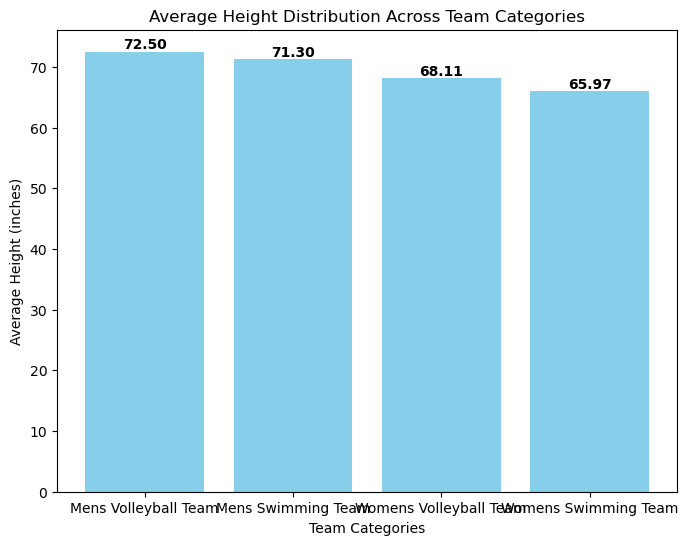

In [8]:
webpage()